## Tema 2 ML - Fotin Andrei-Stefan 343C3

Libraries and other dependencies

In [27]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install tensorflow

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imports

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [13]:
# Încărcarea seturilor de date
mitbih_train = pd.read_csv('/content/drive/MyDrive/ML_Tema2/dataset/mitbih_train.csv')
mitbih_test = pd.read_csv('/content/drive/MyDrive/ML_Tema2/dataset/mitbih_test.csv')
ptbdb_abnormal = pd.read_csv('/content/drive/MyDrive/ML_Tema2/dataset/ptbdb_abnormal.csv')
ptbdb_normal = pd.read_csv('/content/drive/MyDrive/ML_Tema2/dataset/ptbdb_normal.csv')

# 3.1. Explorarea Datelor Secvențiale

#### 1. Analiza Echilibrului de Clase

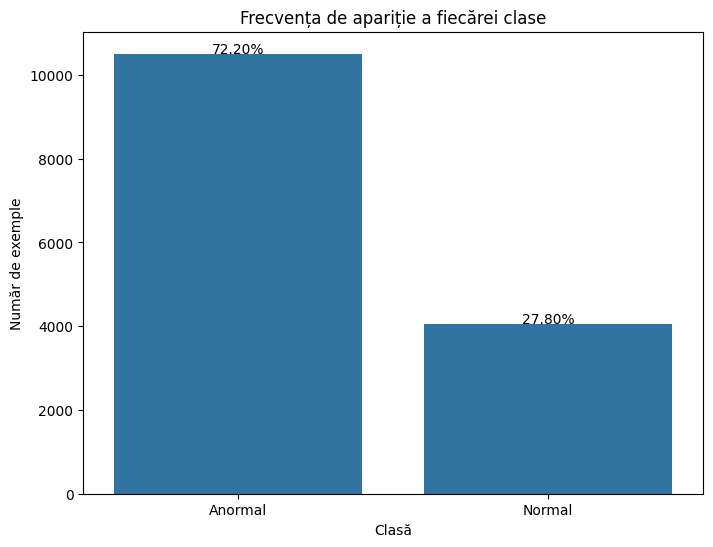

In [14]:
# Analiza echilibrului de clase pentru setul de date PTB Diagnostic ECG
ptbdb_abnormal['label'] = 'Anormal'
ptbdb_normal['label'] = 'Normal'
ptbdb = pd.concat([ptbdb_abnormal, ptbdb_normal])

# Crearea graficului
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=ptbdb)
plt.title('Frecvența de apariție a fiecărei clase')
plt.xlabel('Clasă')
plt.ylabel('Număr de exemple')

# Adăugarea procentajului pe grafic
for index, value in enumerate(ptbdb['label'].value_counts(normalize=True) * 100):
    plt.text(index, ptbdb['label'].value_counts()[index] + 10, f'{value:.2f}%', ha='center')

plt.show()

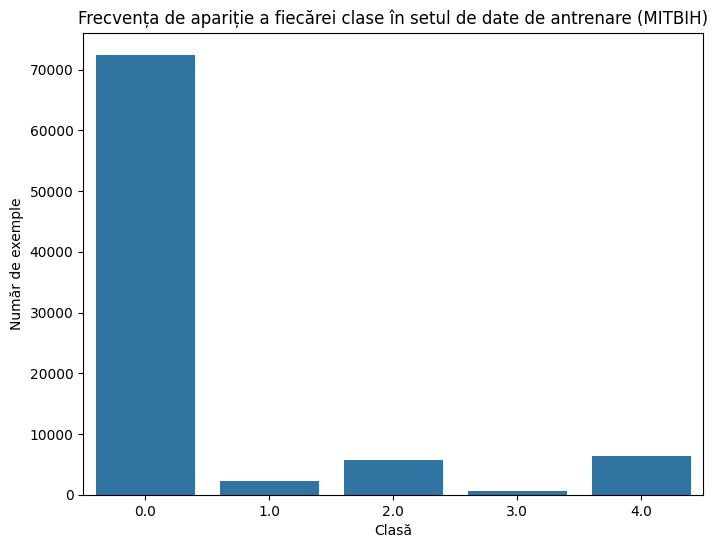

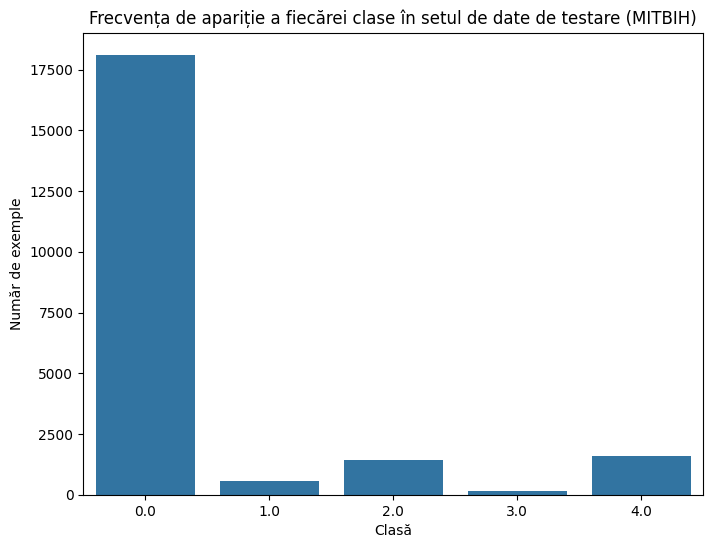

In [15]:
class_col_train = mitbih_train.iloc[:, -1]
class_col_test = mitbih_test.iloc[:, -1]

# Analiza echilibrului de clase pentru seturile de date MITBIH
plt.figure(figsize=(8, 6))
sns.countplot(x=class_col_train)
plt.title('Frecvența de apariție a fiecărei clase în setul de date de antrenare (MITBIH)')
plt.xlabel('Clasă')
plt.ylabel('Număr de exemple')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x=class_col_test)
plt.title('Frecvența de apariție a fiecărei clase în setul de date de testare (MITBIH)')
plt.xlabel('Clasă')
plt.ylabel('Număr de exemple')
plt.show()

#### 2. Vizualizarea Seriilor de Timp

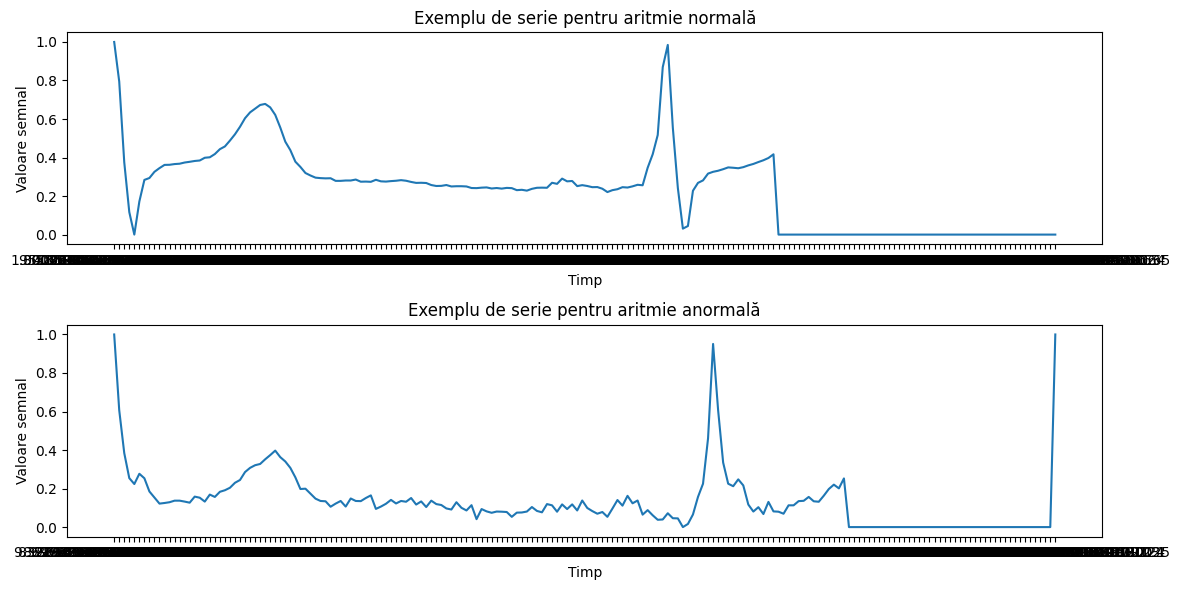

In [16]:
# Vizualizarea seriilor de timp pentru fiecare categorie de aritmie
plt.figure(figsize=(12, 6))

# Exemplu de serie pentru aritmie normală
plt.subplot(2, 1, 1)
plt.plot(ptbdb_normal.iloc[0, :-1])
plt.title('Exemplu de serie pentru aritmie normală')
plt.xlabel('Timp')
plt.ylabel('Valoare semnal')

# Exemplu de serie pentru aritmie anormală
plt.subplot(2, 1, 2)
plt.plot(ptbdb_abnormal.iloc[0, :-1])
plt.title('Exemplu de serie pentru aritmie anormală')
plt.xlabel('Timp')
plt.ylabel('Valoare semnal')

plt.tight_layout()
plt.show()

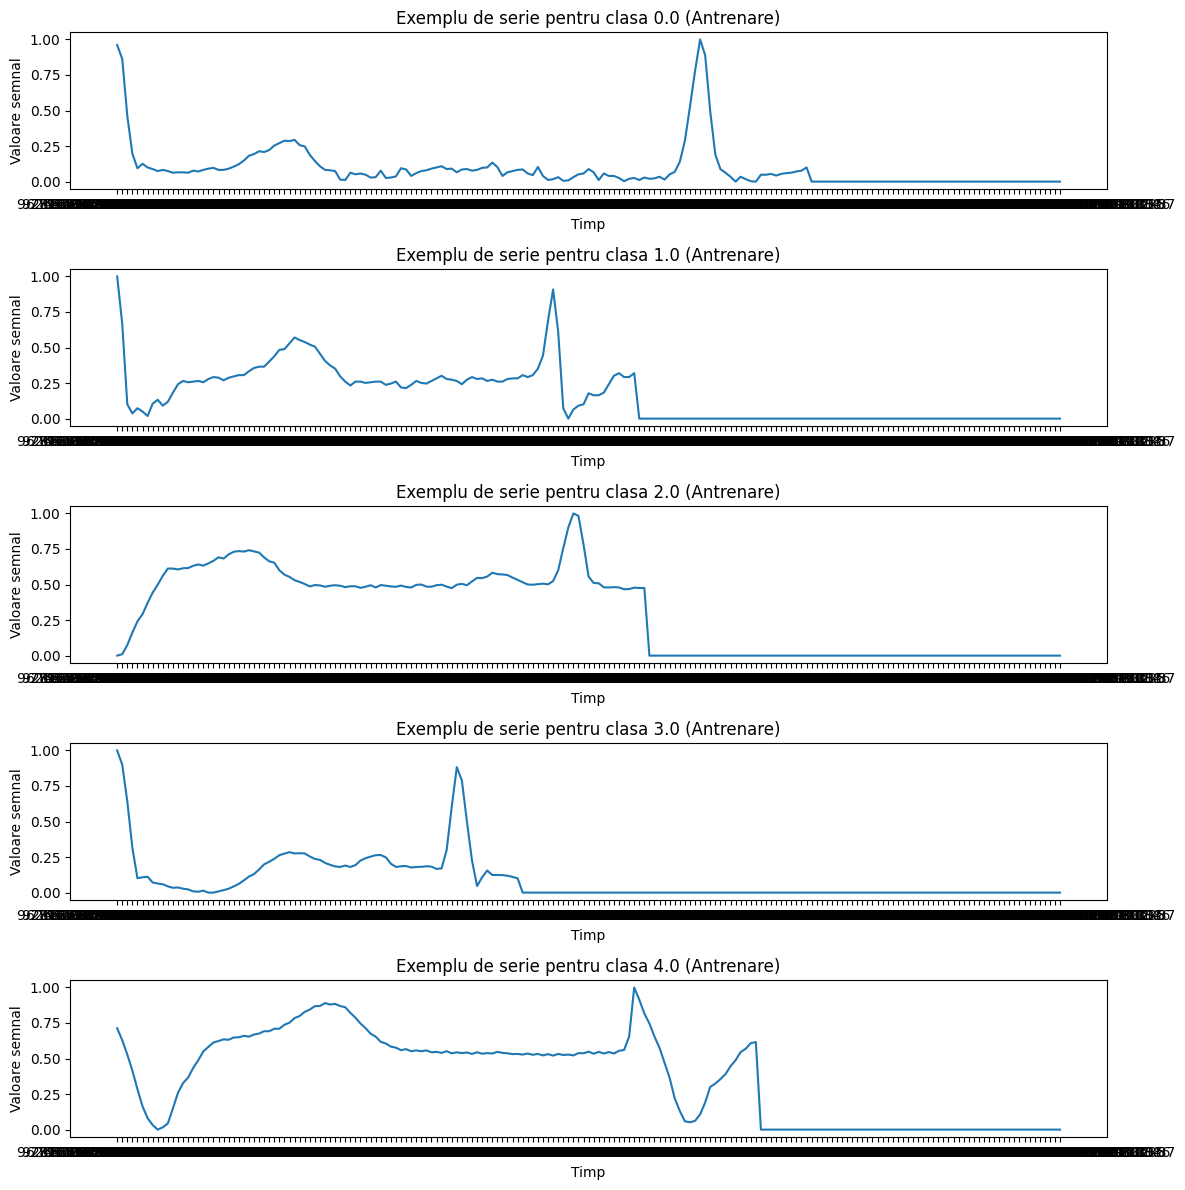

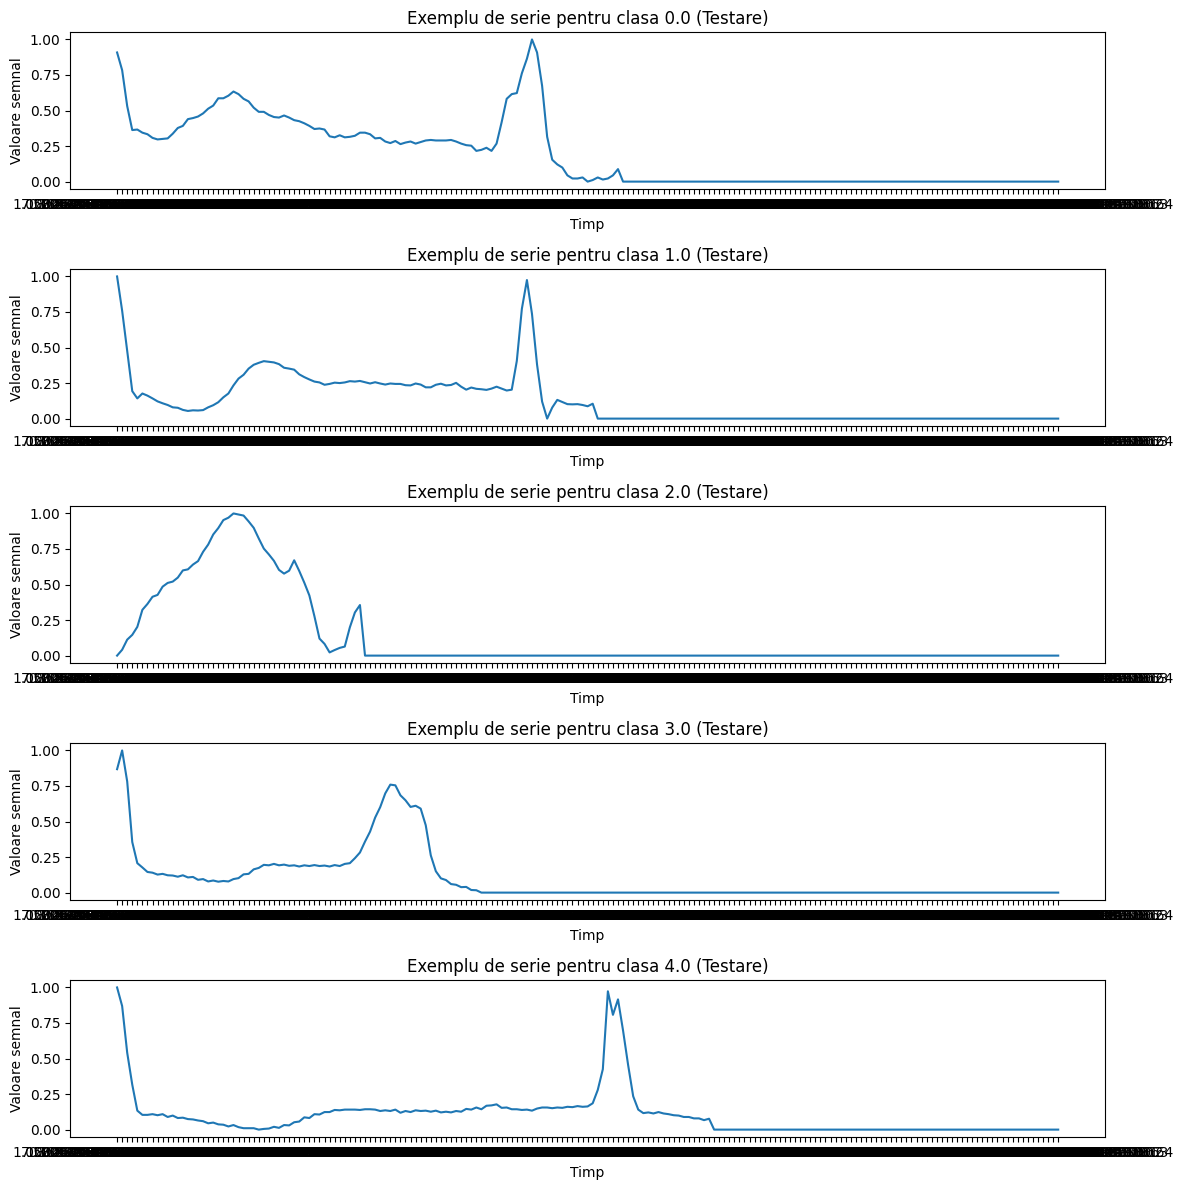

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [17]:
unique_classes_train = mitbih_train.iloc[:, -1].unique()
unique_classes_test = mitbih_test.iloc[:, -1].unique()

plt.figure(figsize=(12, 12))

# Plotting examples from the training set
for idx, cls in enumerate(unique_classes_train):
    plt.subplot(len(unique_classes_train), 1, idx + 1)
    example = mitbih_train[mitbih_train.iloc[:, -1] == cls].iloc[0, :-1]
    plt.plot(example)
    plt.title(f'Exemplu de serie pentru clasa {cls} (Antrenare)')
    plt.xlabel('Timp')
    plt.ylabel('Valoare semnal')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 12))

# Plotting examples from the test set
for idx, cls in enumerate(unique_classes_test):
    plt.subplot(len(unique_classes_test), 1, idx + 1)
    example = mitbih_test[mitbih_test.iloc[:, -1] == cls].iloc[0, :-1]
    plt.plot(example)
    plt.title(f'Exemplu de serie pentru clasa {cls} (Testare)')
    plt.xlabel('Timp')
    plt.ylabel('Valoare semnal')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 12))

#### Calcularea și vizualizarea mediei și deviației standard

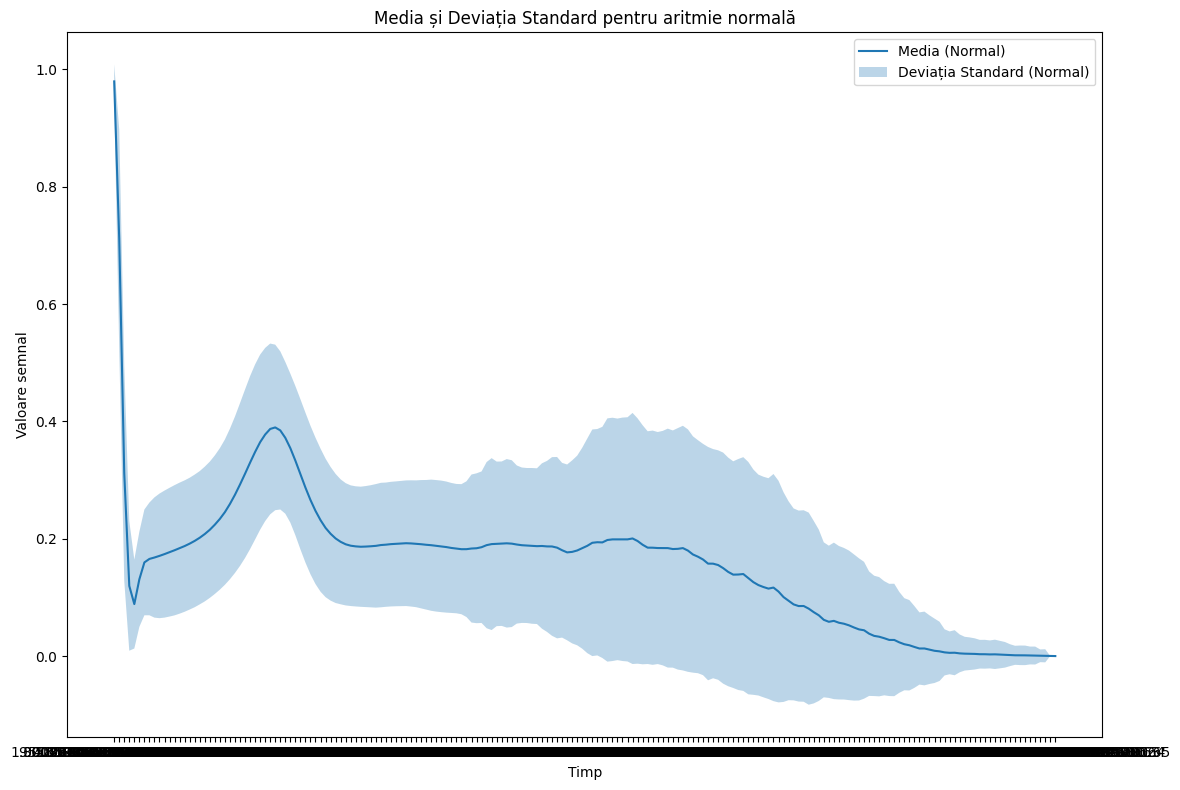

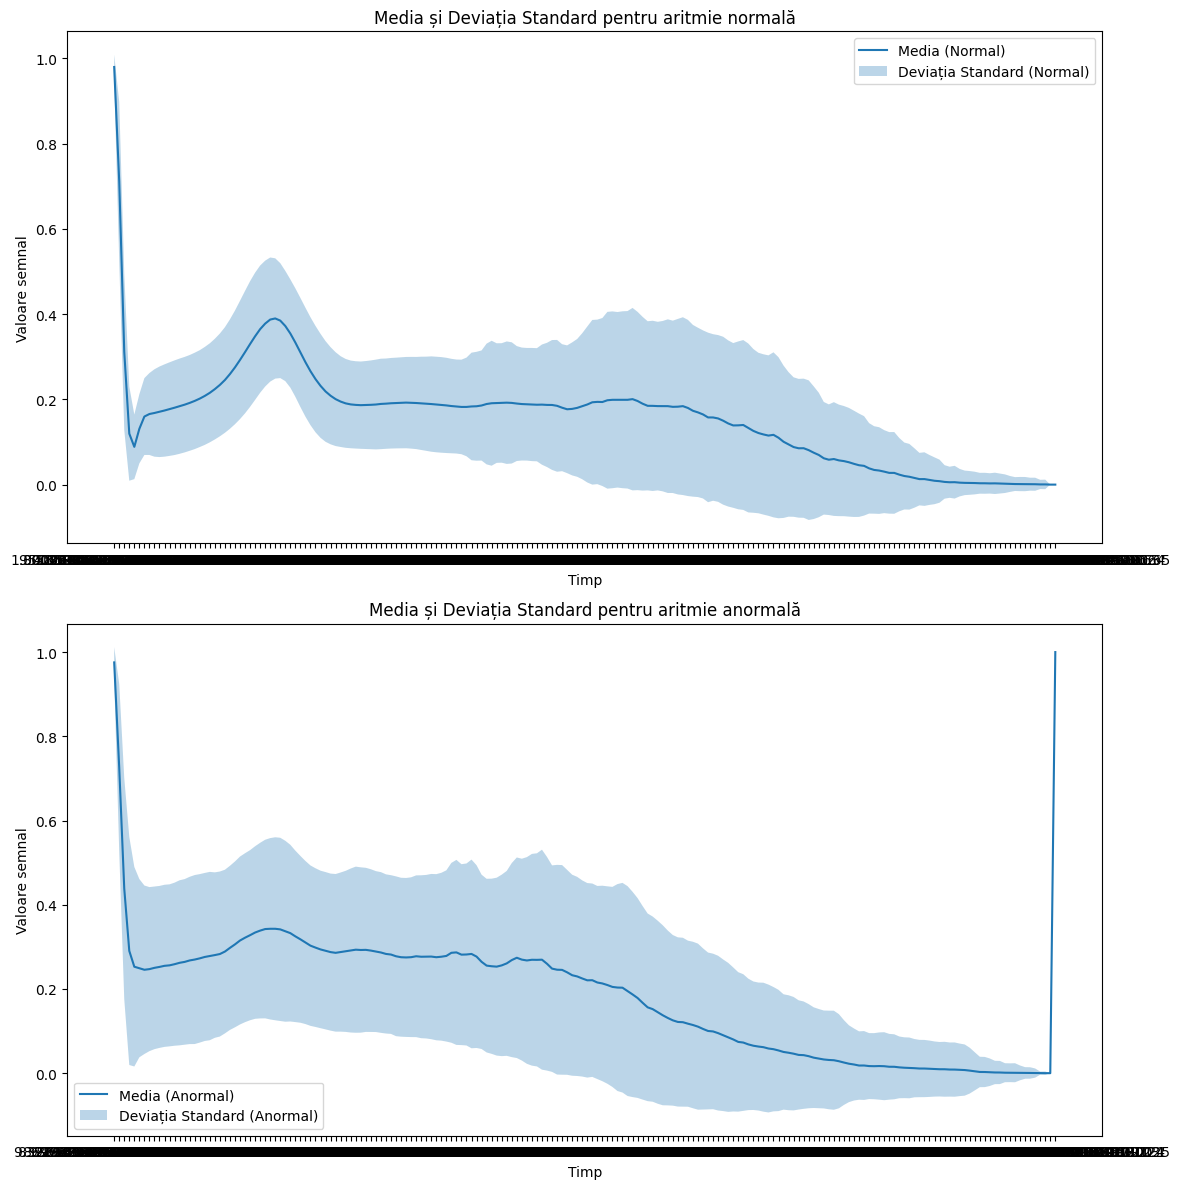

In [18]:
# Mean and standard deviation for normal data
normal_data = ptbdb_normal.iloc[:, :-1]
mean_values_normal = normal_data.mean(axis=0)
std_values_normal = normal_data.std(axis=0)

# Creștem dimensiunea figurii pentru a face graficul mai înalt
plt.figure(figsize=(12, 8))

# Creăm un singur subplot care ocupă întreaga figură
plt.subplot(1, 1, 1)
plt.plot(mean_values_normal, label='Media (Normal)')
plt.fill_between(range(len(mean_values_normal)), mean_values_normal - std_values_normal, mean_values_normal + std_values_normal, alpha=0.3, label='Deviația Standard (Normal)')
plt.title('Media și Deviația Standard pentru aritmie normală')
plt.xlabel('Timp')
plt.ylabel('Valoare semnal')
plt.legend()

plt.tight_layout()
plt.show()

# Vizualizarea mediilor și deviațiilor standard pentru datele normale și anormale într-o singură figură
plt.figure(figsize=(12, 12))

# Mean and standard deviation for normal data
plt.subplot(2, 1, 1)
plt.plot(mean_values_normal, label='Media (Normal)')
plt.fill_between(range(len(mean_values_normal)), mean_values_normal - std_values_normal, mean_values_normal + std_values_normal, alpha=0.3, label='Deviația Standard (Normal)')
plt.title('Media și Deviația Standard pentru aritmie normală')
plt.xlabel('Timp')
plt.ylabel('Valoare semnal')
plt.legend()

# Mean and standard deviation for abnormal data
abnormal_data = ptbdb_abnormal.iloc[:, :-1]
mean_values_abnormal = abnormal_data.mean(axis=0)
std_values_abnormal = abnormal_data.std(axis=0)
plt.subplot(2, 1, 2)
plt.plot(mean_values_abnormal, label='Media (Anormal)')
plt.fill_between(range(len(mean_values_abnormal)), mean_values_abnormal - std_values_abnormal, mean_values_abnormal + std_values_abnormal, alpha=0.3, label='Deviația Standard (Anormal)')
plt.title('Media și Deviația Standard pentru aritmie anormală')
plt.xlabel('Timp')
plt.ylabel('Valoare semnal')
plt.legend()

plt.tight_layout()
plt.show()

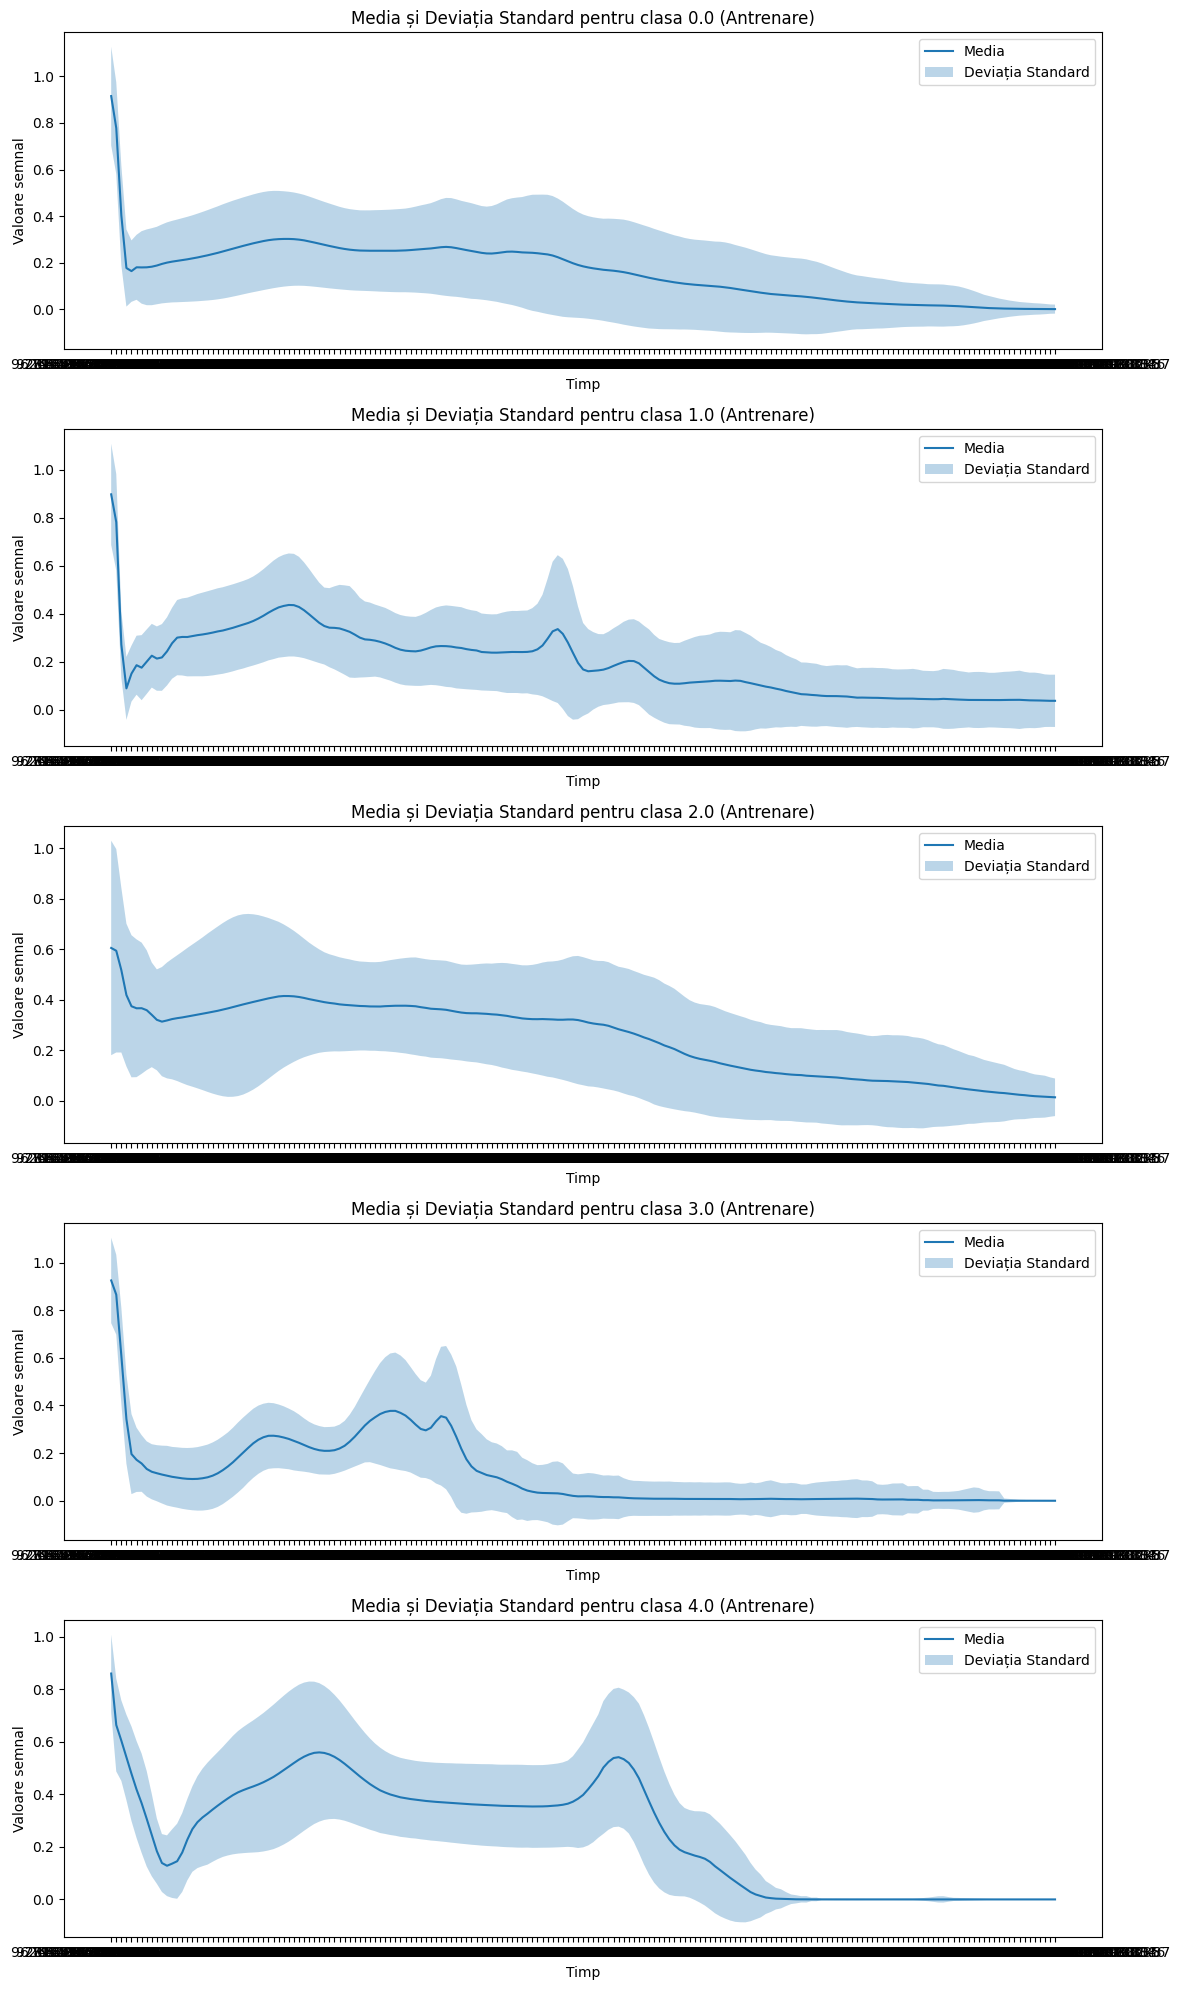

In [19]:
# Mean and standard deviation for training set
plt.figure(figsize=(12, 4 * len(unique_classes_train)))  # Adjust the height based on the number of classes
for idx, cls in enumerate(unique_classes_train):
    class_data = mitbih_train[mitbih_train.iloc[:, -1] == cls].iloc[:, :-1]
    mean_values = class_data.mean(axis=0)
    std_values = class_data.std(axis=0)
    plt.subplot(len(unique_classes_train), 1, idx + 1)
    plt.plot(mean_values, label='Media')
    plt.fill_between(range(len(mean_values)), mean_values - std_values, mean_values + std_values, alpha=0.3, label='Deviația Standard')
    plt.title(f'Media și Deviația Standard pentru clasa {cls} (Antrenare)')
    plt.xlabel('Timp')
    plt.ylabel('Valoare semnal')
    plt.legend()

plt.tight_layout()
plt.show()

# 3.2. Utilizarea modelelor de Rețele Neurale

#### Arhitectură de tip MLP (Multi-Layered Perceptron)

Setul de date Patients (mitbih)

Arhitectura rețelei MLP:
- Intrare: toate datele pacientului.
- Straturi ascunse: experimentăm cu diferite numere și dimensiuni de neuroni.
- Strat de ieșire: un strat cu o activare softmax pentru clasificare.

Parametri de optimizare:
- Optimizator: ADAM
- Batch size: 32
- Learning rate: 0.001
- Epochs: 50
- Regularizare: Dropout

Epoch 1/50
2737/2737 [==============================] - 15s 5ms/step - loss: 0.4358 - accuracy: 0.8830 - val_loss: 0.2457 - val_accuracy: 0.9290
Epoch 2/50
2737/2737 [==============================] - 11s 4ms/step - loss: 0.2925 - accuracy: 0.9212 - val_loss: 0.2018 - val_accuracy: 0.9445
Epoch 3/50
2737/2737 [==============================] - 11s 4ms/step - loss: 0.2583 - accuracy: 0.9316 - val_loss: 0.1781 - val_accuracy: 0.9474
Epoch 4/50
2737/2737 [==============================] - 11s 4ms/step - loss: 0.2336 - accuracy: 0.9389 - val_loss: 0.1583 - val_accuracy: 0.9546
Epoch 5/50
2737/2737 [==============================] - 9s 3ms/step - loss: 0.2183 - accuracy: 0.9424 - val_loss: 0.1471 - val_accuracy: 0.9600
Epoch 6/50
2737/2737 [==============================] - 10s 4ms/step - loss: 0.2068 - accuracy: 0.9450 - val_loss: 0.1481 - val_accuracy: 0.9586
Epoch 7/50
2737/2737 [==============================] - 11s 4ms/step - loss: 0.2008 - accuracy: 0.9461 - val_loss: 0.1463 - val_acc

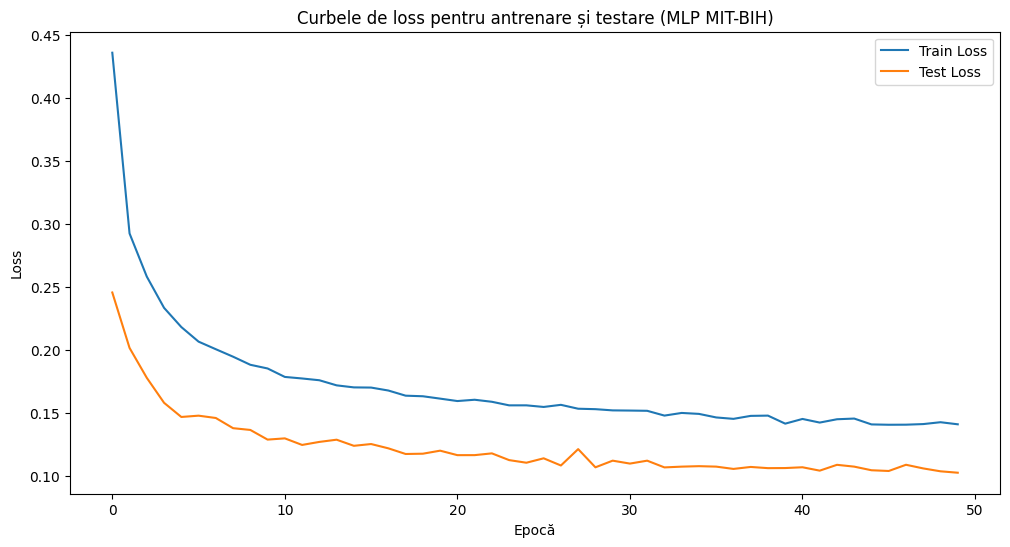

In [22]:
# Pregătirea datelor de antrenare și testare
X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values
X_test = mitbih_test.iloc[:, :-1].values
y_test = mitbih_test.iloc[:, -1].values

# Standardizarea datelor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crearea modelului MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 clase pentru MIT-BIH
])

# Compilarea modelului
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Antrenarea modelului
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Vizualizarea curbelor de loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Curbele de loss pentru antrenare și testare (MLP MIT-BIH)')
plt.xlabel('Epocă')
plt.ylabel('Loss')
plt.legend()
plt.show()

Setul de date PTB Diagnostic ECG

Arhitectura rețelei MLP:
- Intrare: întreaga secvență a unei bătăi de inimă
- Straturi ascunse: experimentăm cu diferite numere și dimensiuni de neuroni
- Strat de ieșire: un strat cu o activare softmax pentru clasificare

Parametri de optimizare:
- Optimizator: ADAM
- Batch size: 32
- Learning rate: 0.001
- Epochs: 50
- Regularizare: Dropout

In [46]:
# Încărcarea datelor
ptbdb_data = pd.concat([ptbdb_normal, ptbdb_abnormal])
X = ptbdb_data.drop('label', axis=1).values
y = ptbdb_data['label'].values

# Împărțirea datelor în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizarea datelor
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crearea modelului MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 clase pentru PTB Diagnostic ECG (normal și anormal)
])

# Compilarea modelului
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Antrenarea modelului
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Vizualizarea curbelor de loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Curbele de loss pentru antrenare și testare (MLP PTB Diagnostic ECG)')
plt.xlabel('Epocă')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dimensiunea lui X: (14550, 309)
Dimensiunea lui y: (14550,)
Tipurile de date: 0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
304    float64
305    float64
306    float64
307    float64
308    float64
Length: 309, dtype: object
Există valori nule în setul de date. Eliminând...
Noile dimensiuni ale lui X după eliminarea valorilor nule: (14550, 67)
Epoch 1/50


UnimplementedError: Graph execution error:

Detected at node Cast_1 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-46-a0090e5960c5>", line 40, in <cell line: 40>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn

  File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 708, in update_state

Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_726370]

## 2. Arhitectură de tip Convoluțională (Conv1D)

Setul de date PTB Diagnostic ECG

Arhitectura rețelei convoluționale:
- Straturi de convoluție 1D
- Global average pooling.
- Straturi dense la final.

Parametri de optimizare:
- Optimizator: ADAM
- Batch size: 32
- Learning rate: 0.001
- Epochs: 50
- Regularizare: Dropout.

In [47]:
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D

# Crearea modelului convoluțional
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilarea modelului
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Reshape datele pentru Conv1D
X_train_conv = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_conv = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Antrenarea modelului
history = model.fit(X_train_conv, y_train, epochs=50, batch_size=32, validation_data=(X_test_conv, y_test))

# Vizualizarea curbelor de loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Curbele de loss pentru antrenare și testare (Conv1D)')
plt.xlabel('Epocă')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50


UnimplementedError: Graph execution error:

Detected at node binary_crossentropy/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-47-fa00377af1e9>", line 21, in <cell line: 21>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2521, in binary_crossentropy

Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_727842]

#### Evaluarea modelelor

1. Afișarea curbelor de loss pentru fiecare modelPentru fiecare model antrenat, curbele de loss vor fi afișate pentru a compara performanța.

2. Matricea de confuzieVom calcula și afișa matricea de confuzie pentru fiecare model pentru a analiza performanța clasificării.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matricea de confuzie pentru setul de date Patients
y_pred = model.predict(X_test).round()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matricea de confuzie pentru setul de date Patients')
plt.show()

# Matricea de confuzie pentru setul de date PTB Diagnostic ECG
y_pred = model.predict(X_test_conv).round()
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matricea de confuzie pentru setul de date PTB Diagnostic ECG')
plt.show()


#### Tabelul de performanță

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcularea metricilor de performanță
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Crearea tabelului de performanță
import pandas as pd

performance_table = pd.DataFrame({
    'Model': ['MLP Patients', 'MLP PTB', 'Conv1D PTB'],
    'Accuracy': [accuracy_mlp_patients, accuracy_mlp_ptb, accuracy_conv1d_ptb],
    'Precision': [precision_mlp_patients, precision_mlp_ptb, precision_conv1d_ptb],
    'Recall': [recall_mlp_patients, recall_mlp_ptb, recall_conv1d_ptb],
    'F1 Score': [f1_mlp_patients, f1_mlp_ptb, f1_conv1d_ptb]
})

print(performance_table)
